In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv("UBER.csv")
print(data.head())

         Date   Open       High        Low      Close  Adj Close    Volume
0  2020-07-29  30.92  31.260000  30.770000  31.020000  31.020000   8215900
1  2020-07-30  30.65  30.680000  29.969999  30.240000  30.240000  13062900
2  2020-07-31  30.40  30.420000  29.785000  30.260000  30.260000  16346800
3  2020-08-03  30.24  31.295000  30.059999  31.190001  31.190001  17078900
4  2020-08-04  31.17  32.845001  31.170000  32.680000  32.680000  21958100


Close column contains the values whose future values we want to predict. So let’s have a closer look at the historical close prices of Microsoft’s stock price:

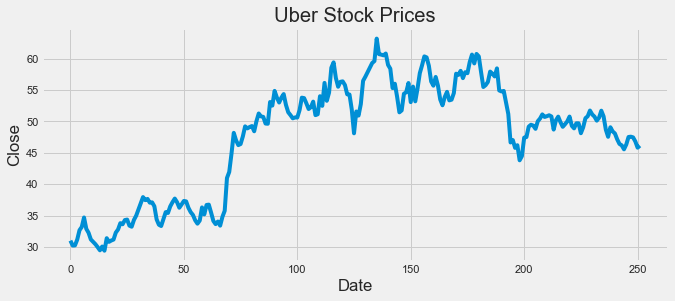

In [3]:
plt.figure(figsize=(10, 4))
plt.title("Uber Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now let’s have a look at the correlation between the features of this dataset:

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996462  0.995743  0.991408   0.991408 -0.063148
High       0.996462  1.000000  0.995776  0.996556   0.996556 -0.034626
Low        0.995743  0.995776  1.000000  0.995916   0.995916 -0.087649
Close      0.991408  0.996556  0.995916  1.000000   1.000000 -0.058259
Adj Close  0.991408  0.996556  0.995916  1.000000   1.000000 -0.058259
Volume    -0.063148 -0.034626 -0.087649 -0.058259  -0.058259  1.000000


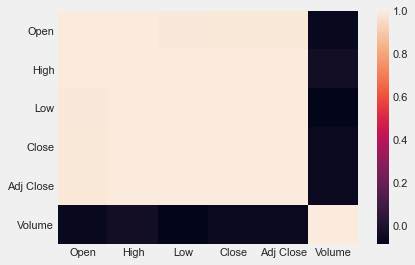

In [4]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

Now I’ll prepare the data to fit into the machine learning model. In this step, I will first add the most important features to x and the target column to y, and then I will divide the dataset into training and test sets:

In [5]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


Now let’s use the Decision Tree Regression Algorithm to train the Uber Stock Price prediction model and have a look at the predicted stock prices for the next 5 days:

In [6]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0       53.779999
1       33.720001
2       52.520000
3       58.439999
4       57.599998


In [9]:
score = model.score(xtest, ytest)


In [10]:
score

0.9938916588456406